<a href="https://colab.research.google.com/github/Vikashchaurasia01/Machine_Learning_Projects/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ld = pd.read_csv("/content/drive/MyDrive/LoanApprovalPrediction.csv")
ld

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
type(ld)

pandas.core.frame.DataFrame

In [5]:
ld.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
ld.shape

(598, 13)

In [7]:
ld.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [8]:
ld.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


In [9]:
ld=ld.dropna()

In [10]:
ld.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [11]:
ld.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

<ipython-input-11-1ffb814e59f0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ld.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)
<ipython-input-11-1ffb814e59f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [12]:
ld.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
ld['Dependents'].value_counts()

,count
Dependents,
0.0,289
2.0,90
1.0,84
3.0,42


In [14]:
ld=ld.replace(to_replace='3+',value=4)

In [15]:
ld['Dependents'].value_counts()           #3+ changed to 4

,count
Dependents,
0.0,289
2.0,90
1.0,84
3.0,42


<Axes: xlabel='Education', ylabel='count'>

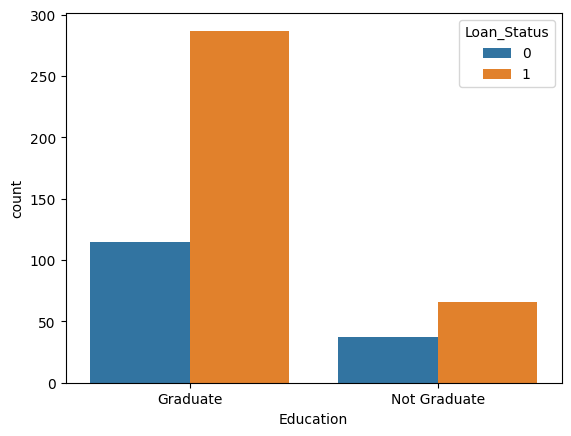

In [16]:
# education & loan status
sns.countplot(x='Education',hue='Loan_Status',data=ld)

<Axes: xlabel='Married', ylabel='count'>

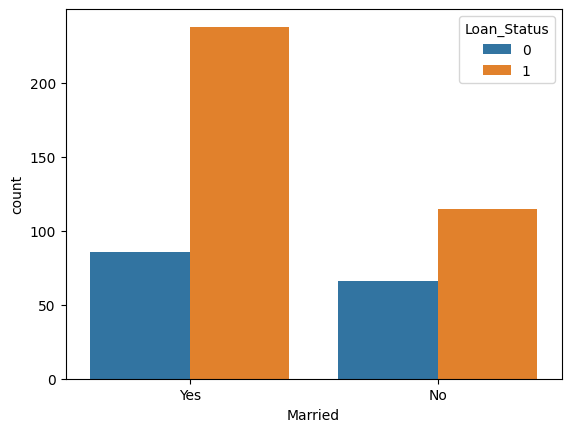

In [17]:
# married & loan status
sns.countplot(x='Married',hue='Loan_Status',data=ld)

<Axes: xlabel='Gender', ylabel='count'>

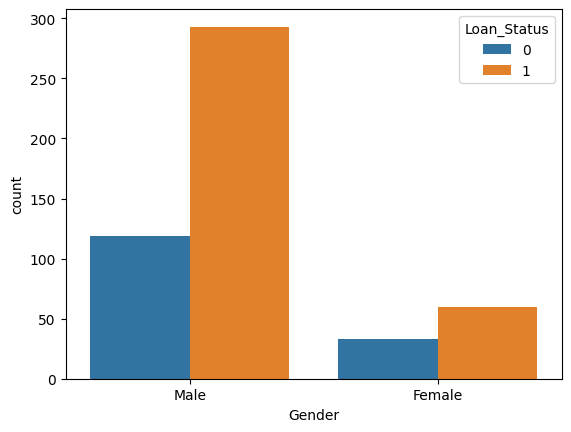

In [18]:
# gender & loan status
sns.countplot(x='Gender',hue='Loan_Status',data=ld)

In [19]:
# categorical to numerical
ld.replace({'Married':{"No":0,'Yes':1},'Gender':{"Male":1,'Female':0},'Self_Employed':{"No":0,'Yes':1}
            ,'Property_Area':{"Rural":0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-19-ab1733088d51>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ld.replace({'Married':{"No":0,'Yes':1},'Gender':{"Male":1,'Female':0},'Self_Employed':{"No":0,'Yes':1}


In [20]:
# separating data and label
x=ld.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=ld['Loan_Status']
print(x)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1         1.0          1              0             4583   
2         1        1         0.0          1              1             3000   
3         1        1         0.0          0              0             2583   
4         1        0         0.0          1              0             6000   
5         1        1         2.0          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
593       0        0         0.0          1              0             2900   
594       1        1         3.0          1              0             4106   
595       1        1         1.0          1              0             8072   
596       1        1         2.0          1              0             7583   
597       0        0         0.0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [21]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=2)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(505, 11) (454, 11) (51, 11)


**Support Vector Machine (SVM)**

In [23]:
c=svm.SVC(kernel='linear')

In [24]:
c.fit(x_train,y_train)

SVC(kernel='linear')

In [25]:
x_train_prediction=c.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [26]:
print('accuracy on training data: ',training_data_accuracy)

accuracy on training data:  0.8039647577092511


In [27]:
x_test_prediction=c.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [28]:
print('accuracy on test data: ',test_data_accuracy)

accuracy on test data:  0.7647058823529411


**Random Forest Classifier**

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

In [31]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=2)

In [32]:
x_train_prediction_rf = rf_classifier.predict(x_train)
x_test_prediction_rf = rf_classifier.predict(x_test)

In [33]:
training_data_accuracy_rf = accuracy_score(x_train_prediction_rf, y_train)
test_data_accuracy_rf = accuracy_score(x_test_prediction_rf, y_test)

print('Accuracy on training data (Random Forest): ', training_data_accuracy_rf)
print('Accuracy on test data (Random Forest): ', test_data_accuracy_rf)

Accuracy on training data (Random Forest):  1.0
Accuracy on test data (Random Forest):  0.8235294117647058


**Naive Bayes Classifier**

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_classifier = GaussianNB()

In [36]:
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [37]:
x_train_prediction_nb = nb_classifier.predict(x_train)
x_test_prediction_nb = nb_classifier.predict(x_test)

In [38]:
training_data_accuracy_nb = accuracy_score(x_train_prediction_nb, y_train)
test_data_accuracy_nb = accuracy_score(x_test_prediction_nb, y_test)

print('Accuracy on training data (Naive Bayes): ', training_data_accuracy_nb)
print('Accuracy on test data (Naive Bayes): ', test_data_accuracy_nb)

Accuracy on training data (Naive Bayes):  0.8127753303964758
Accuracy on test data (Naive Bayes):  0.7843137254901961


**K-Neighbors Classifier (KNN)**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [41]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
x_train_prediction_knn = knn_classifier.predict(x_train)
x_test_prediction_knn = knn_classifier.predict(x_test)

In [43]:
training_data_accuracy_knn = accuracy_score(x_train_prediction_knn, y_train)
test_data_accuracy_knn = accuracy_score(x_test_prediction_knn, y_test)

print('Accuracy on training data (KNN): ', training_data_accuracy_knn)
print('Accuracy on test data (KNN): ', test_data_accuracy_knn)

Accuracy on training data (KNN):  0.7466960352422908
Accuracy on test data (KNN):  0.6862745098039216


In [44]:
data = {
    'Algorithm': ['Support Vector Machine (SVM)', 'Random Forest Classifier', 'Naive Bayes Classifier', 'K-Neighbors Classifier (KNN)'],
    'Training Accuracy': [0.80, 1.0, 0.80, 0.79],
    'Test Accuracy': [0.83, 0.81, 0.83, 0.69]
}

df = pd.DataFrame(data)

display(df)

,Algorithm,Training Accuracy,Test Accuracy
0,Support Vector Machine (SVM),0.80,0.83
1,Random Forest Classifier,1.00,0.81
2,Naive Bayes Classifier,0.80,0.83
3,K-Neighbors Classifier (KNN),0.79,0.69
